# Assignment 2 - Weather

Create a plot of the temperature over time.

*Author: Eoghan Walsh*

## Import the modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

## Import the data

In [3]:
# Import the csv file with pandas.
csv_file = "./data/weatherreadings1.csv"

weather = pd.read_csv(csv_file)

## First look at the data

In [4]:
# Let's look at the data.
weather.head(3)

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947


## Clean the data

In [5]:
# Let's check the dtypes of the columns we want to plot.
time = weather["reportStartDateTime"].dtype
temp = weather["dryBulbTemperature_Celsius"].dtype

print(f"Time: {time}\nTemperature: {temp}")

Time: object
Temperature: float64


In [6]:
# Let's convert the dtype of the reportStartDateTime column to datetime.
weather["reportStartDateTime"] = pd.to_datetime(weather["reportStartDateTime"])

weather["reportStartDateTime"].dtype

datetime64[ns, UTC]

## Plot temperature over time

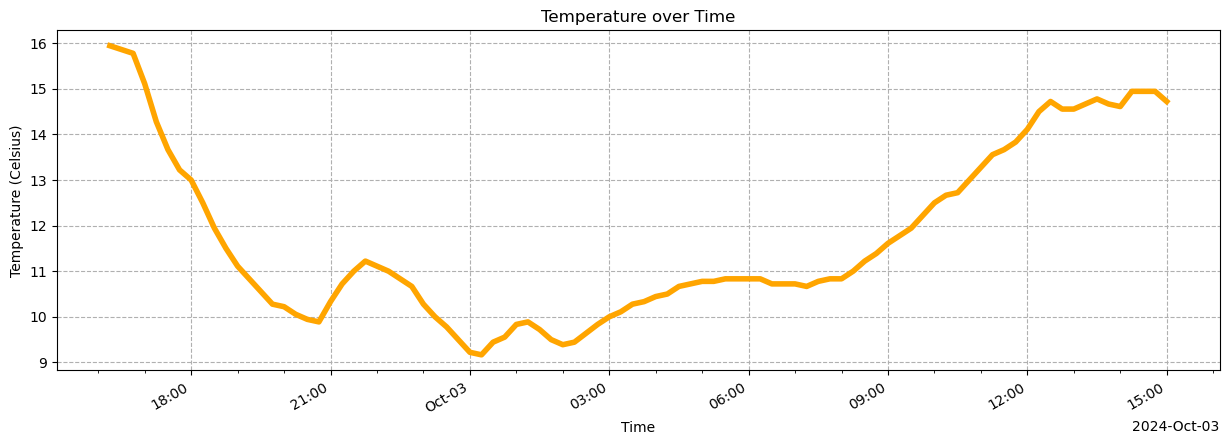

In [7]:
# x and y variables.
x = weather["reportStartDateTime"]
y = weather["dryBulbTemperature_Celsius"]

# Plot type.
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, y, color="orange", linewidth=4)

# Set title and axix labels.
ax.set_title("Temperature over Time")
ax.set_ylabel("Temperature (Celsius)")
ax.set_xlabel("Time")

# Add grid.
ax.grid(linestyle="--")

# Format x axis.
# References:
# https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.ConciseDateFormatter
# https://matplotlib.org/stable/gallery/showcase/anatomy.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.autofmt_xdate.html
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
fig.autofmt_xdate()

# Show plot.
plt.show()